### **Introduction to Image Processing Techniques** 

This notebook provides an overview of image processing techniques, focusing on both basic and advanced methods. Key topics include:

- **Segmentation by Clustering**: Utilizing clustering algorithms such as K-Means, DBSCAN, and Agglomerative Clustering for image segmentation.  
- **Applications**: Demonstrating concepts like boundary detection and background subtraction.  
- **Image Segmentation by Clustering Pixels**: A detailed analysis of clustering methods for segmenting images efficiently.  

It serves as a comprehensive guide to understanding and implementing clustering-based image segmentation techniques.


### **Image Segmentation Using K-Means Clustering**

This section explains the process of segmenting an image using K-Means clustering. The steps include:

1. **Image Loading**: Load and convert the image to RGB color space for processing.  
2. **Reshape Image**: Transform the 3D image array into a 2D array of pixels for clustering.  
3. **Apply K-Means Clustering**: Choose the number of clusters (K) and group similar pixels using K-Means.  
4. **Reshape Segmented Image**: Convert the clustered pixels back to the original dimensions for visualization.  
5. **Display Images**: Compare the original and segmented images side-by-side using `matplotlib`.

This method simplifies image representation and highlights meaningful segments effectively.


In [10]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


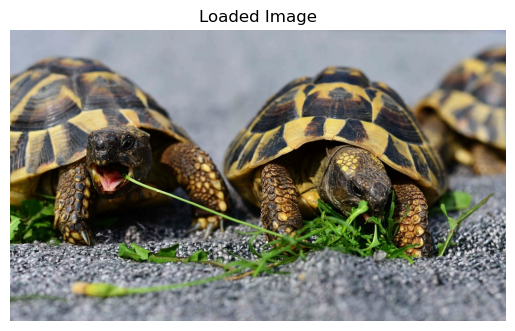

In [23]:
import cv2
from matplotlib import pyplot as plt

# Specify the path to the image
image_path = r'C:\Users\sravi\Desktop\toto.jpg'

# Load the image
image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV loads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title('Loaded Image')
plt.axis('off')
plt.show()


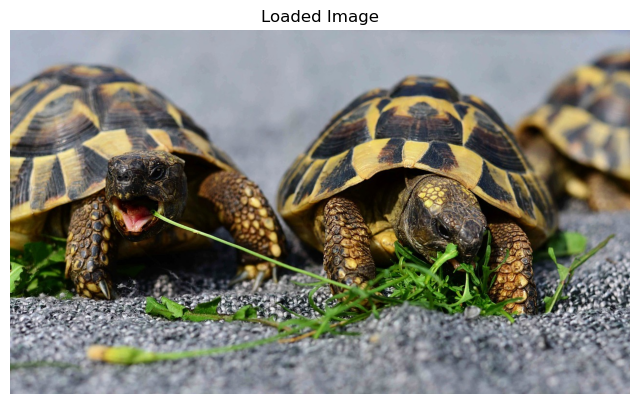

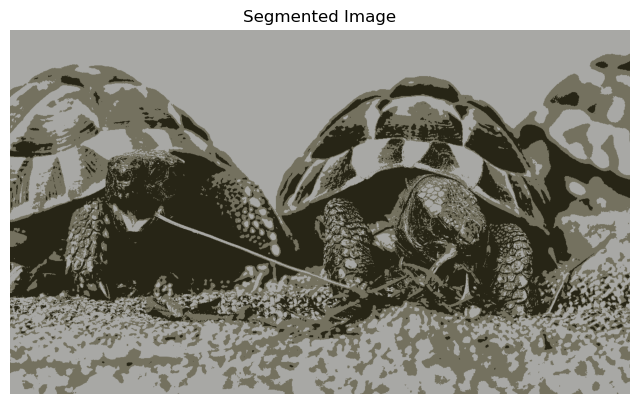

In [25]:
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Specify the path to the image on your local system
image_path = r'C:\Users\sravi\Desktop\toto.jpg'

# Load the image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Unable to load the image. Check the path.")
else:
    # Convert the image to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the loaded image
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title("Loaded Image")
    plt.axis("off")
    plt.show()

    # Optional: Prepare the image for clustering (reshaping into a 2D array of pixels)
    pixel_data = image_rgb.reshape((-1, 3))

    # Perform KMeans clustering (example with 3 clusters)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(pixel_data)

    # Replace pixel values with their corresponding cluster center
    clustered_pixels = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')

    # Reshape back to the original image shape
    segmented_image = clustered_pixels.reshape(image_rgb.shape)

    # Display the segmented image
    plt.figure(figsize=(8, 6))
    plt.imshow(segmented_image)
    plt.title("Segmented Image")
    plt.axis("off")
    plt.show()


## Enhanced Image Processing: Grayscale, Boundary Detection, and Background Subtraction


This section demonstrates advanced image processing techniques, including **grayscale conversion**, **boundary detection**, and **background subtraction**, enhanced with K-means clusterin
---

## Steps Followed

1. **Image Loading and Display**:
   - The image is loaded from a specified path, verified for correctness, and displayed using `matplotlib`.

2. **Grayscale Conversion**:
   - The RGB image is converted into grayscale to simplify boundary detection tasks.

3. **K-means Clustering for Segmentation**:
   - K-means clustering is applied to segment the image into distinct clusters for better analysis.

4. **Boundary Detection**:
   - The **Canny edge detection** algorithm is employed on the grayscale image to identify and highlight edges.

5. **Background Subtraction**:
   - A mask is created to subtract the background and replace it with a blue color while preserving the foreground (e.g., greenery).

6. **Display Processed Images**:
   - The following processed images are displayed side-by-side for comparison:
     - Original Image
     - Grayscale Image
     - Segmented Image
     - Edge Detection Result
     - Final Imagerious computer vision applications.


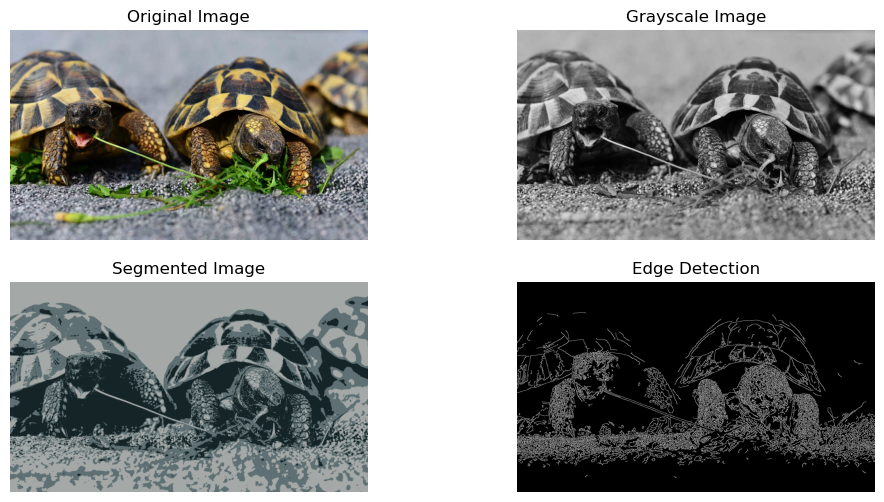

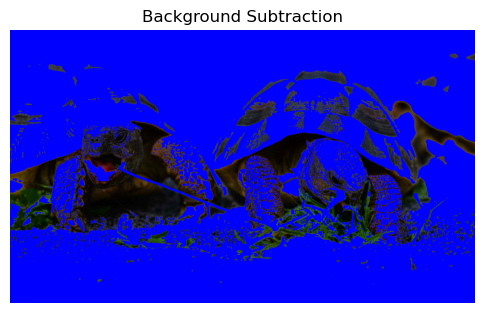

In [27]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the path to your image
# Update this to your image path
image_path = r'C:\Users\sravi\Desktop\toto.jpg'  # Example path

# Load the image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise ValueError("Image not loaded. Check the file path or upload.")

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.subplot(2, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Reshape the image to a 2D array of pixels for clustering
pixels = image.reshape(-1, 3)

# Number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)
labels = kmeans.predict(pixels)
segmented_image = kmeans.cluster_centers_[labels]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)
segmented_image = segmented_image.astype(np.uint8)

# Display the segmented image
plt.subplot(2, 2, 3)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

# Short boundary detection
edges = cv2.Canny(gray_image, 100, 200)

# Display the edges
plt.subplot(2, 2, 4)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

# Background subtraction (Blue background, Greenery foreground)
blue_background = np.zeros_like(image)
blue_background[:] = [255, 0, 0]  # Blue color
foreground_mask = (labels == np.argmin(np.sum(kmeans.cluster_centers_ - [34, 139, 34], axis=1))).reshape(image.shape[:2])
result_image = np.where(foreground_mask[..., None], image, blue_background)

# Display the result of background subtraction
plt.figure(figsize=(6, 6))
plt.title('Background Subtraction')
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
